In [2]:
    
    if __name__ == '__main__':
        %reload_ext __init__
        %reload_ext __style__

    import jupyter, notebook, IPython, mistune as markdown, IPython as python, ast, jinja2 as template, importnb as _import_, doctest, pathlib, graphviz
    
    
    with _import_.Notebook(): 
        try: from . import imports
        except: import imports
    with imports.PidginLoader(): 
        try: from . import exports, testing, implementation, test_pidgin_syntax as syntax, cli
        except: import exports, testing, implementation, test_pidgin_syntax as syntax, cli
    

In [5]:
    
    if __name__ == '__main__': 
        shell = get_ipython()
        import __init__ as pidgin
        with imports.PidginLoader(): 
            try: from . import appendix
            except: import appendix
        import pandas as 🐼
    xonsh = None
    Ø = __name__ == '__main__'
    

    
    if Ø:
        input_formats = !pandoc --list-input-formats
        input_formats = {x.split('_')[0] for x in input_formats}
        kernels = 🐼.read_html(appendix.get('https://github.com/jupyter/jupyter/wiki/Jupyter-kernels'))[0]


In [6]:
    def implementation(shell):
The `pidgin` implementation uses the `IPython` configuration
and extension system to modify the interactive computing expierence
in `jupyter` notebooks.
        
        imports.load_ipython_extension(shell)
1. The primary function of `pidgin` is that it `imports` `markdown` as formal language for 
programming multiobjective literate programs.  `imports` focuses on the indentification of
`"code" and not"code"` that become python code.

        testing.load_ipython_extension(shell) 
2. The `pidgin` specification promotes strong intertextuality between `"code" and not"code"` 
objects in a program.  `testing` reinforces that efficacy of the `"code"` using
documentation tests of `doctest and "inline"+"code"`.  `pidgin` uses the narrative a formal 
test for the program.  These tests are executed interactively to ensure the veracity of 
`"code"` signs in the narrative.

        exports.load_ipython_extension(shell)
3. Literate computing in `pidgin` allows incremental development of `"code"` and the co-development of the documentation.
`pidgin` interprets the `input` `"code"` as a `display`.  `pidgin` uses a `template` language to transclude
`object`s from code 

    def implementation(shell):
The `pidgin` implementation uses the `IPython` configuration
and extension system to modify the interactive computing expierence
in `jupyter` notebooks.
        
        imports.load_ipython_extension(shell)
1. The primary function of `pidgin` is that it `imports` `markdown` as formal language for 
programming multiobjective literate programs.  `imports` focuses on the indentification of
`"code" and not"code"` that become python code.

        testing.load_ipython_extension(shell) 
2. The `pidgin` specification promotes strong intertextuality between `"code" and not"code"` 
objects in a program.  `testing` reinforces that efficacy of the `"code"` using
documentation tests of `doctest and "inline"+"code"`.  `pidgin` uses the narrative a formal 
test for the program.  These tests are executed interactively to ensure the veracity of 
`"code"` signs in the narrative.

        exports.load_ipython_extension(shell)
3. Literate computing in `pidgin` allows incremental development of `"code"` and the co-development of the documentation.
`pidgin` interprets the `input` `"code"` as a `display`.  `pidgin` uses a `template` language to transclude
`object`s from code 

In [7]:
            
    load_ipython_extension = implementation
Cannonically, `IPython` use the `load_ipython_extension` to identify extensions.

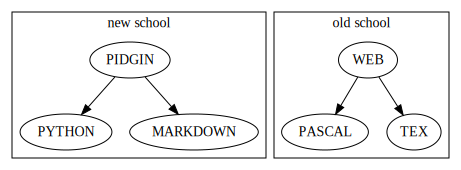

## programming in `markdown and python` 
[📓](imports.ipynb)


    def extension(shell):
        """
The `pidgin` `extension`'s primary function transforms the `jupyter`
`notebook`s into a literate computing interfaces.
`markdown` becomes the primary plain-text format for submitting code,
and the `markdown` is translated to `python` source code
before compilation.
The implementation configures the appropriate
features of the `IPython.InteractiveShell` to accomodate
the interactive literate programming experience.

        """
        pidgin_transformer = PidginTransformer()
        #shell.register_magic_function(pidgin_transformer.pidgin_magic, 'cell', 'pidgin')
        shell.input_transformer_manager = pidgin_transformer
        
        """
`IPython` provides configurable interactive `shell` properties.  Some of the configurable properties
control how `input` code is translated into valid source code. 
The `pidgin` translation is managed by a custom `IPython.core.inputtransformer2.TransformerManager`.
        
        """"""
        >>> shell.input_transformer_manager
        <...PidginTransformer object...>
        
        """"""

The `shell.input_transformer_manager` applies string transformations to clean up the `input`
to be valid `python`.  For example, `IPython` applies line transformations
that strip whitespace and terminal prompts.

        """"""
        >>> assert shell.input_transformer_manager.cleanup_transforms is shell.input_transformers_cleanup
        >>> shell.input_transformers_cleanup
        [<...leading_empty_lines...>, <...leading_indent...>, <...PromptStripper...>, ...]
        
        """"""
        
Another feature of the `shell.input_transformer_manager` are transforms that operate on the entire cell.
        
        """"""
        >>> shell.input_transformer_manager.line_transforms
        [...<...cell_magic...>...]
        
        """"""
Once the input source has passed been translated by the `shell.input_transformer_manager`, 
it is sent to the `shell.compile` method.

        """"""
        >>> shell.ast_transformers
        [...]
        
        """



    class PidginTransformer(IPython.core.inputtransformer2.TransformerManager):
        def pidgin_transform(self, cell: str) -> str: 
            tokens = self.tokenizer.parse(cell)
            return self.tokenizer.untokenize(tokens)

        def transform_cell(self, cell: str) -> str: 
            return super().transform_cell(self.pidgin_transform(cell))
        
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.tokenizer = Tokenizer()
            self.line_transforms.append(demojize)

        def pidgin_magic(self, *text): 
            """Expand the text to tokens to tokens and 
            compact as a formatted `"python"` code."""
            return IPython.display.Code(self.pidgin_transform(''.join(text)), language='python')



    import mistune as markdown, textwrap, __main__, IPython, typing, re, IPython, nbconvert, ipykernel, doctest, ast
    __all__ = 'pidgin',



    class Tokenizer(markdown.BlockLexer):
        """Tokenize `input` text into `"code" and not "code"` tokens that will be translated into valid `python` source.
        
        """
        class grammar_class(markdown.BlockGrammar):
            doctest = doctest.DocTestParser._EXAMPLE_RE

        def parse(self, text: str, default_rules=None) -> typing.List[dict]:
            if not self.depth: self.tokens = []
            with self: tokens = super().parse(whiten(text), default_rules)
            if not self.depth: tokens = self.compact(text, tokens)
            return tokens

        def parse_doctest(self, m): self.tokens.append({'type': 'paragraph', 'text': m.group(0)})
            
        def parse_fences(self, m):
            if m.group(2): self.tokens.append({'type': 'paragraph', 'text': m.group(0)})
            else: super().parse_fences(m)
            
        def parse_hrule(self, m):
            self.tokens.append({'type': 'hrule', 'text': m.group(0)})
            
        def compact(self, text, tokens):
            """Combine non-code tokens into contiguous blocks."""
            compacted = []
            while tokens:
                token = tokens.pop(0)
                if 'text' not in token: continue
                else: 
                    if not token['text'].strip(): continue
                    block, body = token['text'].splitlines(), ""
                while block:
                    line = block.pop(0)
                    if line:
                        before, line, text = text.partition(line)
                        body += before + line
                if token['type']=='code':
                    compacted.append({'type': 'code', 'lang': None, 'text': body})
                else:
                    if compacted and compacted[-1]['type'] == 'paragraph':
                        compacted[-1]['text'] += body
                    else: compacted.append({'type': 'paragraph', 'text': body})
            if compacted and compacted[-1]['type'] == 'paragraph':
                compacted[-1]['text'] += text
            elif text.strip():
                compacted.append({'type': 'paragraph', 'text': text})
            return compacted
        
        depth = 0
        def __enter__(self): self.depth += 1
        def __exit__(self, *e): self.depth -= 1
        
        def untokenize(self, tokens: τ.List[dict], source: str = """""", last: int =0) -> str:
            INDENT = indent = base_indent(tokens) or 4
            for i, token in enumerate(tokens):
                object = token['text']
                if token and token['type'] == 'code':

                    if object.lstrip().startswith(FENCE):

                        object = ''.join(''.join(object.partition(FENCE)[::2]).rpartition(FENCE)[::2])
                        indent = INDENT + num_first_indent(object)
                        object = textwrap.indent(object, INDENT*SPACE)

                    if object.lstrip().startswith(MAGIC):  ...
                    else: indent = num_last_indent(object)
                elif not object: ...
                else:
                    object = textwrap.indent(object, indent*SPACE)
                    for next in tokens[i+1:]:
                        if next['type'] == 'code':
                            next = num_first_indent(next['text'])
                            break
                    else: next = indent       
                    Δ = max(next-indent, 0)

                    if not Δ and source.rstrip().rstrip(CONTINUATION).endswith(COLON): 
                        Δ += 4

                    spaces = num_whitespace(object)
                    "what if the spaces are ling enough"
                    object = object[:spaces] + Δ*SPACE+ object[spaces:]
                    if not source.rstrip().rstrip(CONTINUATION).endswith(QUOTES): 
                        object = quote(object)
                source += object

            for token in reversed(tokens):
                if token['text'].strip():
                    if token['type'] != 'code': 
                        source = source.rstrip() + SEMI
                    break

            return source 
            
    for x in "default_rules footnote_rules list_rules".split():
        setattr(Tokenizer, x, list(getattr(Tokenizer, x)))
        getattr(Tokenizer, x).insert(getattr(Tokenizer, x).index('block_code'), 'doctest')
    



    class PidginPreprocessor(nbconvert.preprocessors.Preprocessor):
        def preprocess_cell(self, cell, resources, index, ):
            if cell['cell_type'] == 'code':
                cell['source'] = idgin_transformer.transform_cell(''.join(cell['source']))
            return cell, resources


Convert pidgin to valid python files.

Import pidgin notebooks as modules.


    class PidginLoader(__import__('importnb').Notebook): 
        extensions = ".ipynb .md.ipynb".split()
        def code(self, str): return ''.join(pidgin.transform_cell(str))


A custom shell and kernel for `pidgin`


    def demojize(lines, delimiters=('_', '_')):
        str = ''.join(lines)
        import tokenize, emoji, stringcase; tokens = []
        try:
            for token in list(tokenize.tokenize(
                __import__('io').BytesIO(str.encode()).readline)):
                if token.type == tokenize.ERRORTOKEN:
                    string = emoji.demojize(token.string, delimiters=delimiters
                                           ).replace('-', '_').replace("’", "_")
                    if tokens and tokens[-1].type == tokenize.NAME: tokens[-1] = tokenize.TokenInfo(tokens[-1].type, tokens[-1].string + string, tokens[-1].start, tokens[-1].end, tokens[-1].line)
                    else: tokens.append(
                        tokenize.TokenInfo(
                            tokenize.NAME, string, token.start, token.end, token.line))
                else: tokens.append(token)
            return tokenize.untokenize(tokens).decode().splitlines(True)
        except BaseException: raise SyntaxError(str)

    pidgin = PidginTransformer()



    import ast
    class ReturnYield(ast.NodeTransformer):
        def visit_FunctionDef(self, node): return node
        visit_AsyncFunctionDef = visit_FunctionDef
        def visit_Return(self, node):
            replace = ast.parse('''__import__('IPython').display.display()''').body[0]
            replace.value.args = node.value.elts if isinstance(node.value, ast.Tuple) else [node.value]
            return ast.copy_location(replace, node)

        def visit_Expr(self, node):
            if isinstance(node.value, (ast.Yield, ast.YieldFrom)):  return ast.copy_location(self.visit_Return(node.value), node)
            return node
        
        visit_Expression = visit_Expr



    class PidginInteractiveShell(IPython.InteractiveShell):
        """Configure a native `pidgin` `IPython.InteractiveShell`"""
    PidginInteractiveShell.input_transformer_manager.default_value = PidginTransformer
    PidginInteractiveShell.enable_html_pager.default_value = True

    class PidginKernelApp(ipykernel.kernelapp.IPKernelApp): 
        """Configure a native `pidgin` `__import__('ipykernel').kernelapp.IPKernelApp"""
    PidginKernelApp.shell.default_value = PidginInteractiveShell


IPython extensions.


    def unload_ipython_extension(shell):
        """
Unload the IPython extension.

        """
        shell.input_transformer_manager = __import__('IPython').core.inputtransformer2.TransformerManager()



    graphviz.Source(
digraph{rankdir=UD 
subgraph cluster_pidgin {label="new school" PIDGIN->{PYTHON MARKDOWN}}
subgraph cluster_web {label="old school" WEB->{PASCAL TEX} }}
    
    )

In [15]:
## programming in `markdown and python` 
[📓]({{pathlib.Path(imports.__file__).name}})


{{appendix.exports(imports)}}

    graphviz.Source(
digraph{rankdir=UD 
subgraph cluster_pidgin {label="new school" PIDGIN->{PYTHON MARKDOWN}}
subgraph cluster_web {label="old school" WEB->{PASCAL TEX} }}
    
    )

In [9]:
## testing `"code"` in the `markdown` narrative.
[📔]({{pathlib.Path(testing.__file__).name}})

{{appendix.exports(testing)}}

## testing `"code"` in the `markdown` narrative.
[📔](testing.md.ipynb)

In literate programs, `"code"` is deeply entangled with the narrative.
`"code"` object can signify meaning and can be validated through testing.
`python` introduced the `doctest` literate programming convention that indicates some text in a narrative can be tested.
`pidgin` extends the `doctest` opinion to the inline markdown code.
Each time a `pidgin` cell is executed, the `doctest`s and inline code are executed ensuring that
any code in a `pidgin` program is valid.



    def post_run_cell(result):
        result.runner = test_markdown_string(result.info.raw_cell, IPython.get_ipython(), False, doctest.ELLIPSIS)

    def load_ipython_extension(shell): 
        unload_ipython_extension(shell)
        shell.events.register('post_run_cell', post_run_cell)



    import doctest, contextlib, mistune as markdown, re, ast, __main__, IPython, operator
    shell = get_ipython()


`test_markdown_string` extends the standard python `doctest` tools 
to inline code objects written in markdown.  
This approach compliments are markdown forward programming language to test
intertextual references between code and narrative.


    INLINE = re.compile(
        markdown.InlineGrammar.code
        .pattern[1:]
        .replace('[\s\S]', '?P<source>[\s\S]')
        .replace('+)\s*', '{1,2})(?P<indent>\s{0})'), 
    )


    (TICK,), SPACE = '`'.split(), ' '



    def test_markdown_string(str, shell=shell, verbose=False, compileflags=None):
        globs, filename = shell.user_ns, F"In[{shell.last_execution_result.execution_count}]"
        runner = doctest.DocTestRunner(verbose=verbose, optionflags=compileflags)  
        parsers = DocTestParser(runner), InlineDoctestParser(runner)
        parsers = {
            parser: doctest.DocTestFinder(verbose, parser).find(str, filename) for parser in parsers
        }
        examples = sum([test.examples for x in parsers.values() for test in x], [])
        examples.sort(key=operator.attrgetter('lineno'))
        with ipython_compiler(shell):
            for example in examples:
                for parser, value in parsers.items():
                    for value in value:
                        if example in value.examples:
                            with parser:
                                runner.run(doctest.DocTest(
                                    [example], globs, value.name, filename, example.lineno, value.docstring
                                ), compileflags=compileflags, clear_globs=False)
        shell.log.info(F"In[{shell.last_execution_result.execution_count}]: {runner.summarize()}")
        return runner



    @contextlib.contextmanager
    def ipython_compiler(shell):
        def compiler(input, filename, symbol, *args, **kwargs):
            nonlocal shell
            return shell.compile(
                ast.Interactive(
                    body=shell.transform_ast(
                        shell.compile.ast_parse(input)
                    ).body
                ),
                F"In[{shell.last_execution_result.execution_count}]",
                "single",
            )

        yield setattr(doctest, "compile", compiler)
        try:
            doctest.compile = compile
        except:
            ...



In [10]:
## Weaving the `markdown` to a rich display.
[📗]({{pathlib.Path(exports.__file__).name}})

{{appendix.exports(exports)}}

## Weaving the `markdown` to a rich display.
[📗](exports.md.ipynb)

This is the weaving step.



    import datetime, dataclasses, sys, IPython as python, IPython, nbconvert as export, collections, IPython as python, mistune as markdown, hashlib
    exporter, shell = export.exporters.TemplateExporter(), python.get_ipython()
    modules = lambda:[x for x in sys.modules if '.' not in x and not str.startswith(x,'_')]



Markdown input can fail to render when jinja2 is used in correctly.  Markdown is never wrong, but sometimes jinja is.



    ---------------------------------------------------------------------------

    NameError                                 Traceback (most recent call last)

    <ipython-input-1-25dc2f3cd961> in <module>
    ----> 1 @dataclasses.dataclass
          2 class Metadata:
          3     def pre_run_cell(self, info):
          4         self.modules = modules()
          5         self.start = datetime.datetime.utcnow().isoformat()


    NameError: name 'dataclasses' is not defined



In [11]:
## `pidgin` metasyntax at language interfaces.
[📗]({{pathlib.Path(syntax.__file__).name}})

The combinations of document, programming, and templating languages
provides unique syntaxes as the interfaces.

{{appendix.exports(syntax)}}

## `pidgin` metasyntax at language interfaces.
[📗](test_pidgin_syntax.md.ipynb)

The combinations of document, programming, and templating languages
provides unique syntaxes as the interfaces.

This is a code string




`pidgin` programming is a `markdown`-forward approach to programming,
it extends computational to interactive literate programming environment.
One feature `markdown` uses to identify `markdown.BlockGrammar.block_code`
is indented code.
`pidgin` starts here, all cells are `markdown` forward, and code is identified as indented code.

            "This is a code string"
    



### Code fences

Some folks may prefer code fences and they may be used without a language specified.


```
"This is code"
```

```python
"This is not code."
```



    class DocStrings:
### Docstrings


    >>> assert DocStrings.__doc__.startswith('### Docstrings')
    >>> DocStrings.function_docstring.__doc__
    '`DocStrings.function_docstring`s appear as native docstrings, ...'


        def function_docstring():
`DocStrings.function_docstring`s appear as native docstrings, but render as `markdown`.
            
            ...

    





    import doctest
### `doctest`

    >>> assert True
    >>> print
    <built-in function print>
    >>> pidgin
    <module...__init__.py'>



### templating

filters
jinja docs



In [22]:
### Reusing `pidgin` documents.

Notebooks gain value when they be reusable at rest.

We'll make a cli application that deploys `pidgin` as a web, cli, converter.


{{appendix.exports(cli)}}

### Reusing `pidgin` documents.

Notebooks gain value when they be reusable at rest.

We'll make a cli application that deploys `pidgin` as a web, cli, converter.


    @click.group()
    def pidgin(): 
The `pidgin` command line application operates on passive notebooks
documents.



    @pidgin.command()
    def serve(modules):
Serve notebook modules from fastapi creating an openapi schema for each 
literate document.



    @pidgin.command()
    def run(modules, parallel=True):
Run a collection of notebook modules.



    @pidgin.command()
    def convert(modules):
Convert notebook written in pidgin to difference formats.



In [12]:
    
    def unload_ipython_extension(shell):
        for x in (exports, testing, imports): x.unload_ipython_extension(shell)